<div style="border:solid green 2px; padding: 20px">
    
<b>Никита, привет! Это Александр</b> Я рад тебя видеть на финальном спринте (Основной проект).

---

Я буду красить комментарии цветом, пожалуйста, не удаляй их:

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Такой комментарий нужно исправить обязательно, он критически влияет на удачное выполнение проекта.
</div>
    
---

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Такой комментарий является рекомендацией или советом. Можешь использовать их на своё усмотрение.
</div>

---

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Такой комментарий  говорит о том, что было сделано что-то качественное и правильное =)
</div>
    
---
    
Предлагаю работать над проектом в диалоге: если у тебя возникают вопросы — пиши об этом в слаке, не стесняйся. Так же, мне будет легче отследить изменения, если ты выделишь свои комментарии:   
    
<div class="alert alert-info"> <b>Комментарии студента:</b> Например, вот так.</div>
    
    
---

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Цель и декомпозиция так и не расписана. Хорошо, когда не просто копировать, а как-то анализировать задачи на вход и приводят понятные цель с точки зрения основной бизнес задачи.

   # Банки — Анализ оттока клиентов
   

В нашем распоряжении данные о клиентах банка, их город, возраст, количество собственности и наличие кредитной карты.
Так же мы располагаем данными об оттоке клиентов.
Наша задача найти причины оттока клиентов, составить их портрет и написать рекомендации отделу маркетинга которые лягут в основу будующих рекламных кампаний.

План работы:
- Загрузка данных 
- Предобработка данных 
- Исследовательский анализ
- Статистический анализ 
- Разделение клиентов на сегменты и их приоритизация 
- Формирование рекомендаций для отдела маркетинга 

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №2__


В идеале можно добавить декомпозицию

## Загрузка данных и библиотек 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Хорошо, модули загружены

In [2]:
try:
    data = pd.read_csv('bank_scrooge.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/bank_scrooge.csv')

In [3]:
data.head(10)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


## Предобработка данных

In [4]:
data.city.value_counts()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

In [5]:
data.columns = data.columns.str.lower()

In [6]:
data.rename(columns={'userid': 'user_id'}, inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [8]:
data['score'] = data['score'].astype(int)

В датасете практически нет пропусков, кроме столбцов возраста и баланса\
пропущенных строк с возрастом не так много так что можем их удалить 

In [9]:
data = data.dropna(subset = ['age'])

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

С возрастом корректно - за малочисленностью можно смело отбросить.


In [10]:
data['age'] = data['age'].astype(int)

найдем причину пропусков в столбце баланса 

In [11]:
unknown_balance = data[data['balance'].isnull()]

In [12]:
known_balance = data.dropna(subset = ['balance'])

In [13]:
unbalance_pivot = unknown_balance.agg({'est_salary': lambda x: x.mean(), 
                      'age': lambda x: x.mean(),
                      'products':lambda x: x.median(),
                      'equity': lambda x: x.median(),
                      'city': lambda x: x.mode().iat[0],
                      'gender': lambda x: x.mode().iat[0],
                      'churn': lambda x: x.mode().iat[0]
                      }).T

In [14]:
unbalance_pivot = unbalance_pivot.to_frame()

In [15]:
known_balance_pivot = known_balance.agg({'est_salary': lambda x: x.mean(), 
                      'age': lambda x: x.mean(),
                      'products':lambda x: x.median(),
                      'equity': lambda x: x.median(),
                      'city': lambda x: x.mode().iat[0],
                      'gender': lambda x: x.mode().iat[0],
                      'churn': lambda x: x.mode().iat[0]
                      }).T

In [16]:
known_balance_pivot = known_balance_pivot.to_frame()

In [17]:
new_balance_pivot = unbalance_pivot.merge(known_balance_pivot, left_index=True, right_index=True)

In [18]:
new_balance_pivot.columns = ['Пропуски','Заполненно']

In [19]:
new_balance_pivot

,Пропуски,Заполненно
est_salary,226345.417464,124520.394264
age,42.093023,42.924366
products,1.0,2.0
equity,0.0,4.0
city,Ярославль,Ярославль
gender,М,Ж
churn,0,0


In [20]:
index_to_remove = ['city', 'gender']  
new_balance_pivot = new_balance_pivot.drop(index_to_remove)

In [21]:
new_balance_pivot

,Пропуски,Заполненно
est_salary,226345.417464,124520.394264
age,42.093023,42.924366
products,1.0,2.0
equity,0.0,4.0
churn,0,0


In [22]:
new_balance_pivot['Относительная разница'] = (new_balance_pivot['Заполненно'] - new_balance_pivot['Пропуски']) / new_balance_pivot['Заполненно']


In [23]:
new_balance_pivot

,Пропуски,Заполненно,Относительная разница
est_salary,226345.417464,124520.394264,-0.817738
age,42.093023,42.924366,0.019368
products,1.0,2.0,0.5
equity,0.0,4.0,1.0
churn,0,0,NaN


Распределение пропусков не зависит от какого то конкретного признака, можем отнести их к категории MAR. Можем заполнить их методом интерполяции 

In [24]:
data['est_salary'].corr(data['balance'])

0.3388004162077205

Заметна умеренная связь баланса с предполагаемым доходом 

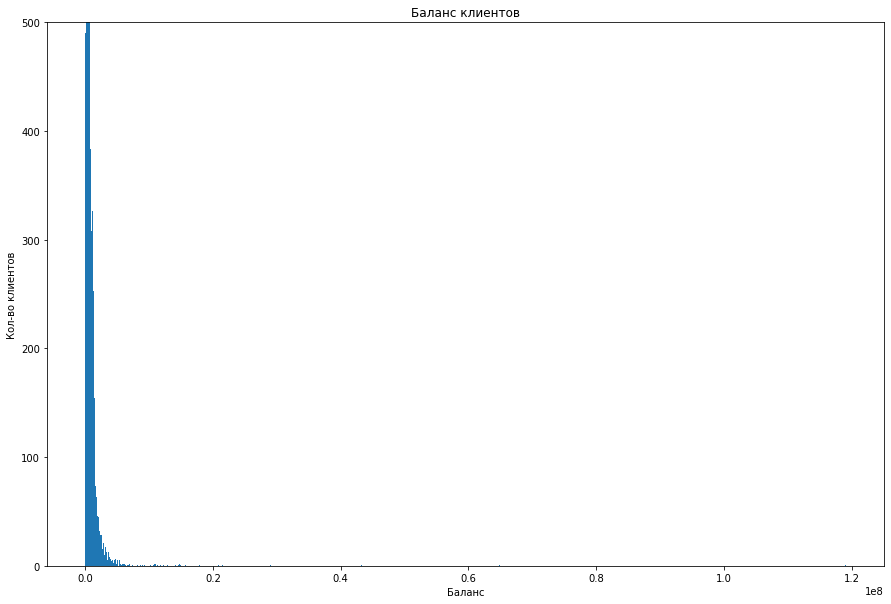

In [25]:
plt.figure(figsize=(15,10))
plt.hist(data['balance'], bins = 1000)
plt.xlabel('Баланс')
plt.ylabel('Кол-во клиентов')
plt.title('Баланс клиентов')
plt.ylim(0 , 500)

plt.show()

<div class="alert alert-info"> <b>Комментарии студента:</b>Здесь я хотел отметить что в данных есть выбросы и скорее построил его для себя чтобы оценить ситуацию.</div>


<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

График по данным построен корректно, но не оформлен до конца. Суть в том, что график должен быть наглядным без контекста (т.к. в реальной практике ты будешь показывать презентации или отчет сторонним людям). 

Тебе необходимо проследить чтобы всегда был заголовок и подписаны оси. Доработай этот момент пожалуйста.
    
Данное замечания относится ко всему проекту и перепроверь его самостоятельно. Далее не буду акцентировать на этом внимание
</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__
Учтено

(0.0, 4000000.0)

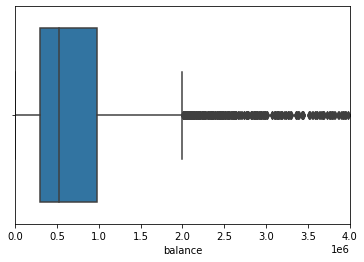

In [26]:
sns.boxplot(x= data['balance'])
plt.xlim(0, 4000000)

In [27]:
data['balance'].quantile(0.95)

2114078.393999996

в данных по балансу есть выбросы а 95% всех значений лежит в пределах 2000000\


In [28]:
data = data.sort_values(by = 'est_salary', ascending = False)

Используем метод интерполяции для заполнения баланса в зависимости от дохода 

In [29]:
data['balance'].interpolate(method='linear', x=data['est_salary'], inplace=True)

In [30]:
data['balance'] = data['balance'].astype(int)

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Замена пропусков на нули в таблице может иметь нежелательные последствия и привести к искажению данных и результатов анализа. Вот несколько основных причин, почему замена пропусков на нули неприемлема:

1. Искажение статистических показателей: Замена пропусков нулями может последовательно искажать статистические показатели, такие как среднее значение (mean) и стандартное отклонение (standard deviation). Если пропуски в данных имеются по каким-то определенным причинам, замена их на нули создаст иллюзию, что в этих местах значения фактически равны нулю. Это искажение может привести к ошибочным статистическим выводам и неправильным интерпретациям.

2. Искажение распределения данных: Пропуски в данных часто имеют систематическую природу и представляют собой информацию. Замена пропусков нулями приведет к добавлению большого количества наблюдений со значением нуля, что может серьезно искажить распределение переменной и создать ложные зависимости или корреляции в данных.

3. Потеря информации: Замена пропусков нулями может скрыть наличие пропущенных данных и потерять или затруднить обнаружение этих пропусков в дальнейшем анализе. Пропуски в данных могут иметь свою собственную семантику и информацию, например, отсутствие значения, значение вне диапазона или информацию об ошибке или недоступности. Изменение их на нули может привести к неправильным выводам и упущенной важной информации.

4. Ложные связи и зависимости: Замена пропусков нулями может создать ложные связи или зависимости между переменными. Если пропуски являются случайной причиной отсутствия информации, замена их на нули может внести несуществующую структуру и создать ложные корреляции или зависимости в данных.

Вместо замены пропусков нулями существуют более адекватные методы обработки пропущенных значений, такие как удаление пропущенных значений, замена их на среднее, медиану или другие статистические меры, использование специальных значений (например, «unknown»), использование методов интерполяции или применение алгоритмов заполнения пропущенных значений, например, на основе машинного обучения.

In [31]:
(data[data['balance'] > 2000000]['balance'].sum())/(data['balance'].sum())

0.3876335948564259

выбросы составляют 63 процента от общего количества баланса 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №2__

А для чего удалять баланс, который менее 2мл? Данные вроде похоже на правду. Также стоит в таких моментах рассчитать, какую долю от общего баланса ты удалил

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №3__

Верное наблюдение, и по итогу получается. Что ты удаляешь 40% баланса банка. Но ведь это реальные клиенты. Либо их оставлять, либо переводить в VIP и проводить дополнительно анализы для VIP клиента

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №4__

Здорово, что разобрались

In [32]:
data['balance'].median()

590668.5

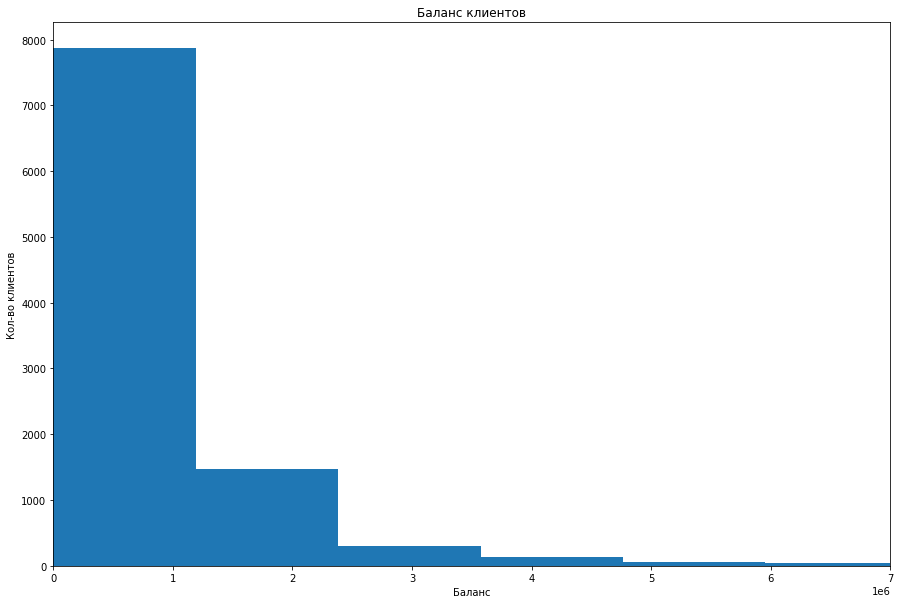

In [33]:

plt.figure(figsize=(15,10))
plt.hist(data['balance'], bins = 100)
plt.xlabel('Баланс')
plt.ylabel('Кол-во клиентов')
plt.title('Баланс клиентов')
plt.xlim(0, 7000000)

plt.show()

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

А что видно на этом графике?

закодируем неупорядоченные переменные для дальнейшего использования их в корреляционном анализе 

In [34]:
data['город'] = data['city']
data = pd.get_dummies(data, columns = ['город'])

In [35]:
data['пол'] = data['gender']
data = pd.get_dummies(data, columns = ['пол'])

проверка на неявные дубликаты

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


"не не явные" = "неявные"

In [36]:
user_dup = data.user_id.duplicated(keep = False)

In [37]:
data[user_dup].sort_values(by = 'user_id', ascending = False).head(12)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,город_Ростов,город_Рыбинск,город_Ярославль,пол_Ж,пол_М
8205,227795,840,Рыбинск,М,34,2,350768,1,1,0,102036.14,1,0,1,0,0,1
8497,227795,839,Ярославль,М,34,2,326593,2,1,0,103314.92,0,0,0,1,0,1
2597,226719,990,Ярославль,М,37,4,14648692,2,0,0,934412.61,1,0,0,1,0,1
4216,226719,903,Рыбинск,Ж,63,0,1219727,1,1,0,138582.58,0,0,1,0,1,0
2302,220816,934,Рыбинск,Ж,74,5,1294285,3,1,0,95606.80,0,0,1,0,1,0
1740,220816,840,Ярославль,Ж,41,3,1193287,2,1,1,76434.94,1,0,0,1,1,0
4623,217826,842,Ярославль,М,39,4,439747,2,0,1,116736.75,1,0,0,1,0,1
9406,217826,790,Рыбинск,Ж,46,4,430414,2,1,1,49400.37,0,0,1,0,1,0
1970,217643,845,Ярославль,М,29,5,733098,4,1,1,41443.01,1,0,0,1,0,1
4186,217643,804,Рыбинск,Ж,40,2,301836,2,1,1,81137.22,0,0,1,0,1,0


In [38]:
data.duplicated(subset = ['user_id','city']).sum()

0

Дубликатов у столбцов user_id и city не обнаруженно, а значит можно не удалять
скорее всего, нумерация клиентов в разных городах может пересекаться 

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Если рассмотреть подробнее, то можно увидеть, что дубликаты отточного пользователя и лояльного. Вероятнее всего, id отточного клиента передали новому лояльному

Вывод по предобработке данных:

На этом этапе нам удалось выяснить что пропуски не зависят от какого то конкретного признака, можем отнести их к категории MAR. Можем заполнить их методом интерполяции

Пропуски в возрасте из-за малого количества можно отбросить.

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Отсутствует вывод о качестве исходных данных. Также не сделан вывод, от какого признака зависят пропуски. Поправишь, пожалуйста?
</div>

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №2__

Признаки описывал на этапе декомпозиции (MAR, MNAR и т.д.). Посмотри, пожалуйста, этот момент в декомпозиции

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №3__

Признаки описывал на этапе декомпозиции (MAR, MNAR и т.д.). Посмотри, пожалуйста, этот момент в декомпозиции

## Исследовательский анализ

построим графики распределения признаков в разрезе оттока 

Возраст. 

In [39]:
data['age'].max()

86

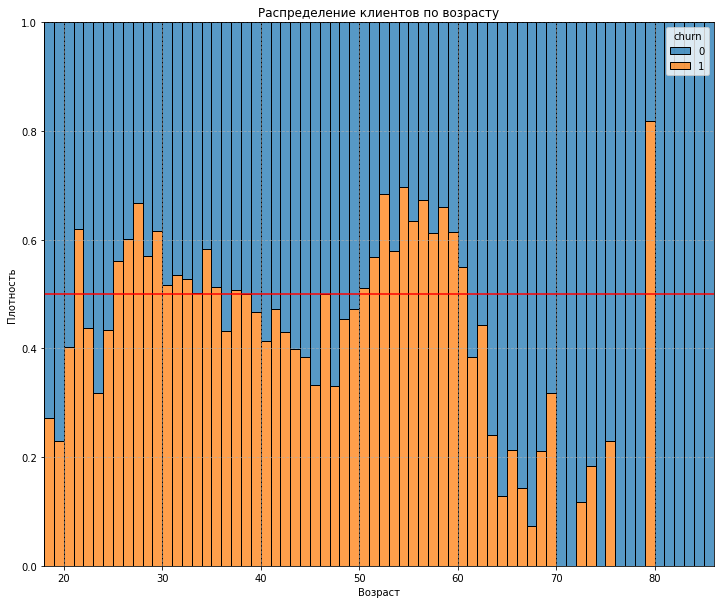

In [40]:
plt.figure(figsize=(12, 10))
sns.histplot(data = data, x = 'age', hue = 'churn',bins = 69, multiple="fill", stat="density", common_norm=False, binwidth=1)

plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y = 0.5, color = 'red')
plt.xlabel('Возраст')
plt.ylabel('Плотность')
plt.title('Распределение клиентов по возрасту')

plt.show()

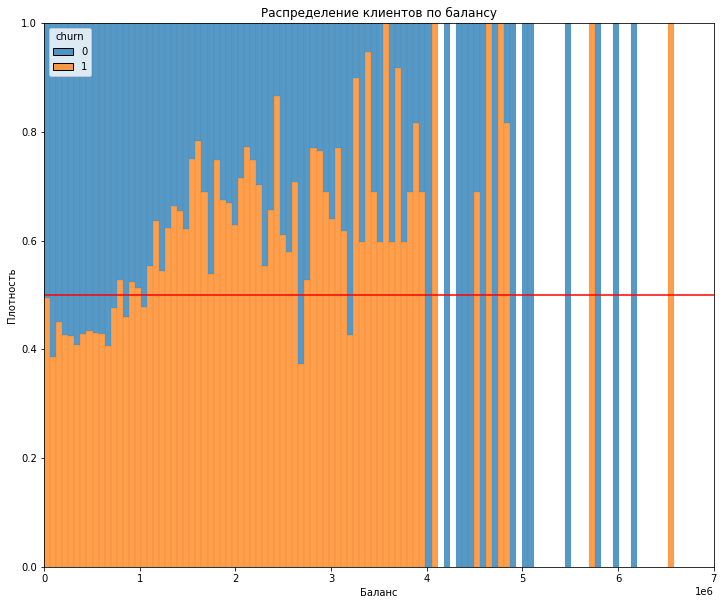

In [91]:
plt.figure(figsize=(12, 10))
sns.histplot(data = data, x = 'balance', hue = 'churn', multiple="fill", stat="density", common_norm=False)
plt.axhline(y = 0.5, color = 'red')
plt.xlim(0, 7000000)
plt.xlabel('Баланс')
plt.ylabel('Плотность')
plt.title('Распределение клиентов по балансу')
plt.show()

Судя по графику отток распределен равномерно, заметна тенденция роста оттока при увеличении баланса.

Наибольший отток зафиксирован у клиентов с балансом от 900 000

Баллы кредитного скоринга 

In [42]:
data.score.max()

1000

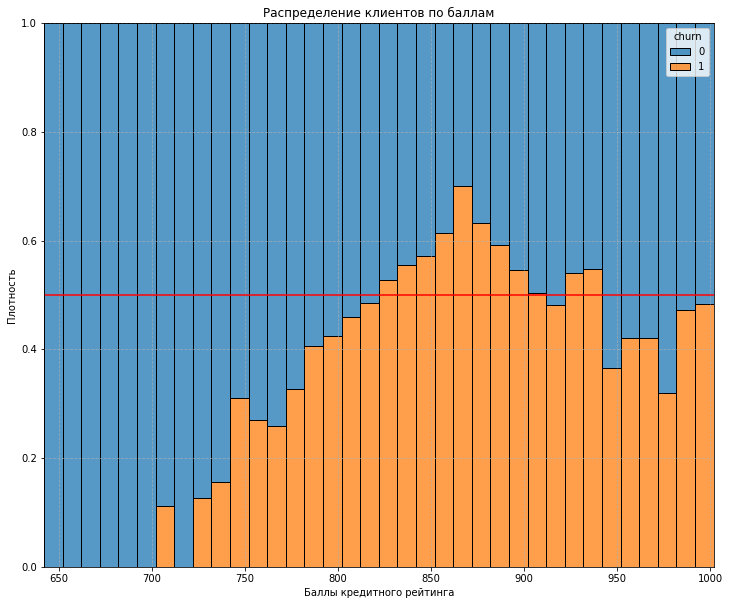

In [43]:
plt.figure(figsize=(12, 10))
sns.histplot(data = data, x = 'score', hue = 'churn', multiple="fill",stat="density", common_norm=False, bins = 38,binwidth=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y = 0.5, color = 'red')
plt.xlabel('Баллы кредитного рейтинга')
plt.ylabel('Плотность')
plt.title('Распределение клиентов по баллам')
plt.show()

у графика нормальное распределение, заметно небольшое смещение оттока в сторону увеличения рейтинга 

По оценочному доходу клиента 

In [44]:
data['est_salary'].quantile(0.99)

886322.5299000009

In [45]:
data[data['est_salary'] > 300000]['user_id'].count()

562

у 99% предполагаемый доход не превышает 310 000, предлагаю все что больше считать выбросами и отсечь 

In [46]:
data = data.query('est_salary < 310000')

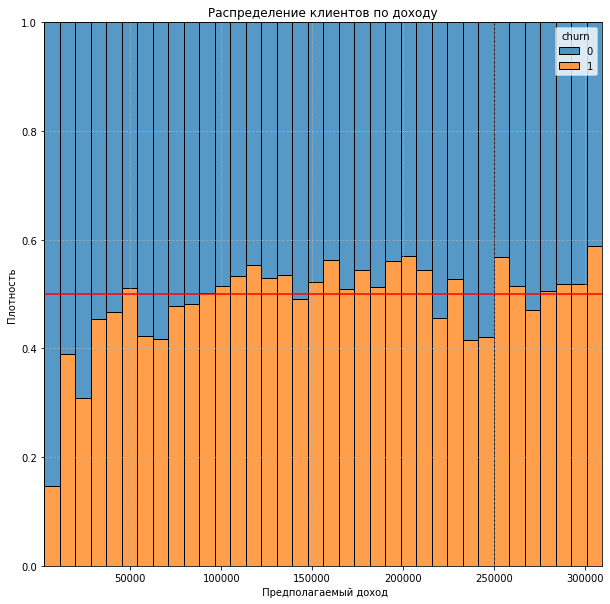

In [47]:
plt.figure(figsize=(10, 10))
sns.histplot(data = data, x = 'est_salary', hue = 'churn', multiple="fill", stat="density", common_norm=False)
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y = 0.5, color = 'red')
plt.xlabel(' Предполагаемый доход')
plt.ylabel('Плотность')
plt.title('Распределение клиентов по доходу')
plt.show()

распределение оттока практически совпадает с распределением оценочного дохода клиентов 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Интересная реализация)

найдем общий отток по банку 

In [48]:
total_churn= (data['churn'].sum()/data['churn'].count()).round(2)
total_churn

0.18

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Среднебанковский отток найден корректно

Пол.

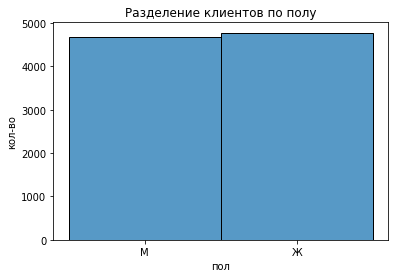

In [49]:
sns.histplot(data = data, x = 'gender')
plt.xlabel('пол')
plt.ylabel('кол-во')
plt.title('Разделение клиентов по полу')
plt.show()

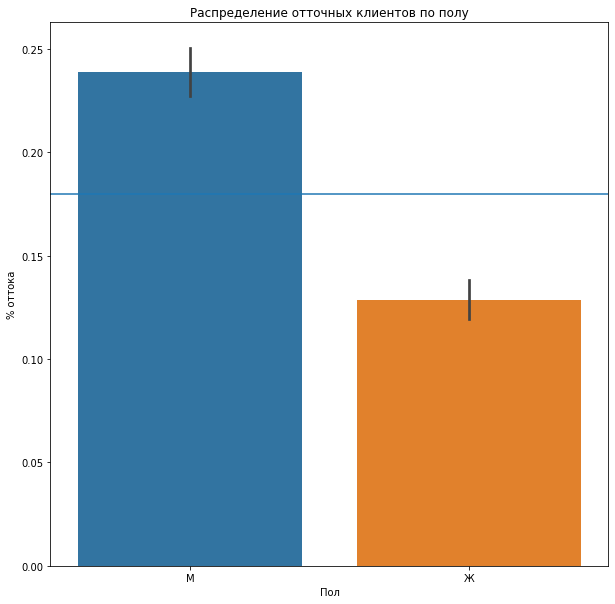

In [50]:
plt.figure(figsize=(10, 10))
sns.barplot(data = data, x = 'gender', y = 'churn')
plt.axhline(y=total_churn)

plt.xlabel('Пол')
plt.ylabel('% оттока')
plt.title('Распределение отточных клиентов по полу')
plt.show()

можно заметить что среди клиентов незначительно больше мужчин, однако отток среди них гораздо выше 

Города 

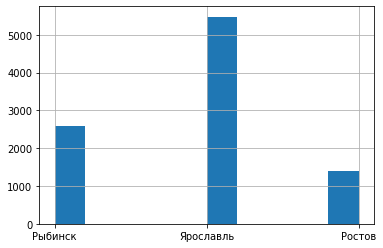

In [51]:
data.city.hist();

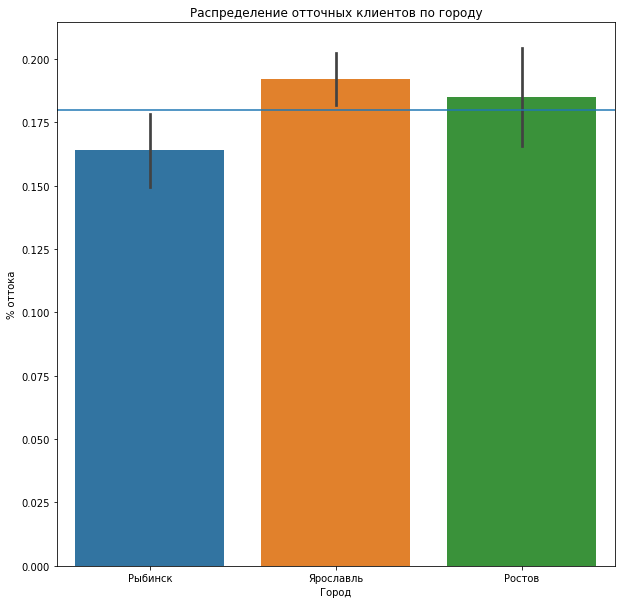

In [52]:
plt.figure(figsize=(10, 10))
sns.barplot(data = data, x = 'city', y = 'churn')
plt.axhline(y=total_churn)
plt.xlabel('Город')
plt.ylabel('% оттока')
plt.title('Распределение отточных клиентов по городу')
plt.show()

Больше всего клиентов из Ярославля, так же в нем оттток больше чем в среднем по банку 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Рыбинск лучший город)

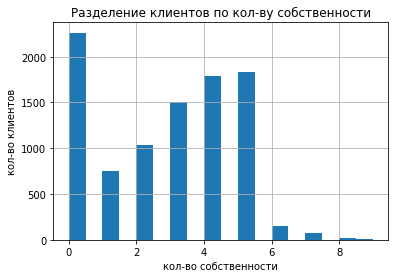

In [53]:
data.equity.hist(bins = 18)
plt.xlabel('кол-во собственности')
plt.ylabel('кол-во клиентов')
plt.title('Разделение клиентов по кол-ву собственности')
plt.show()

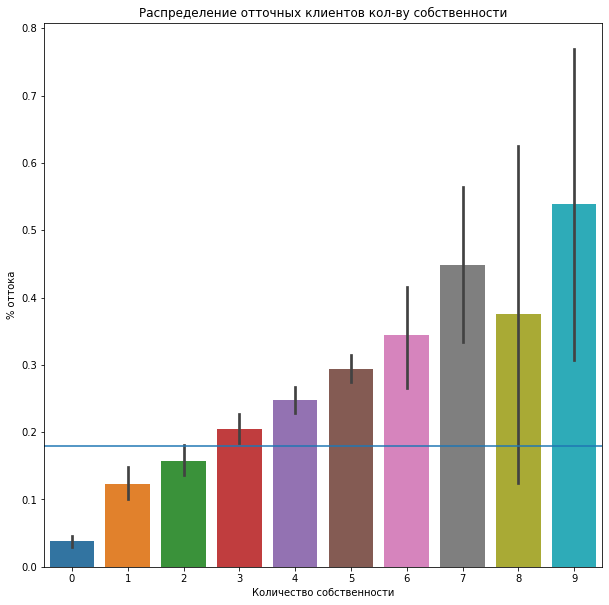

In [54]:
plt.figure(figsize=(10, 10))
sns.barplot(data = data, x = 'equity', y = 'churn')
plt.axhline(y=total_churn)

plt.xlabel('Количество собственности')
plt.ylabel('% оттока')
plt.title('Распределение отточных клиентов кол-ву собственности')
plt.show()

заметна тенденция, количество отточных клиентов увеличивается с количеством баллов собственности 

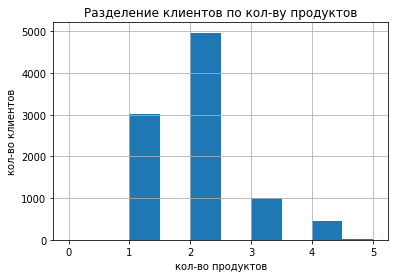

In [55]:
data.products.hist()
plt.xlabel('кол-во продуктов')
plt.ylabel('кол-во клиентов')
plt.title('Разделение клиентов по кол-ву продуктов')
plt.show()

почти у половины клиентов два продукта банка 

In [56]:
data = data[data['products'] != 0]

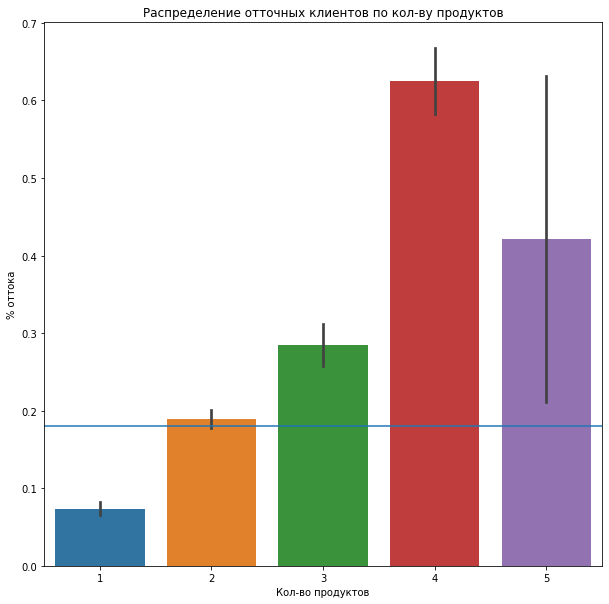

In [57]:
plt.figure(figsize=(10, 10))
sns.barplot(data = data, x = 'products', y = 'churn')
plt.axhline(y=total_churn)
plt.xlabel('Кол-во продуктов')
plt.ylabel('% оттока')
plt.title('Распределение отточных клиентов по кол-ву продуктов')
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

0 продуктов это аномалия.  Предлагаю подумать, все ли значения адекватны

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Учтено

отток выше у людей с 3,4 и 5 продуктами 

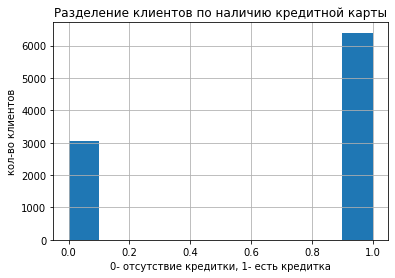

In [58]:
data.credit_card.hist()
plt.xlabel('0- отсутствие кредитки, 1- есть кредитка')
plt.ylabel('кол-во клиентов')
plt.title('Разделение клиентов по наличию кредитной карты')
plt.show()

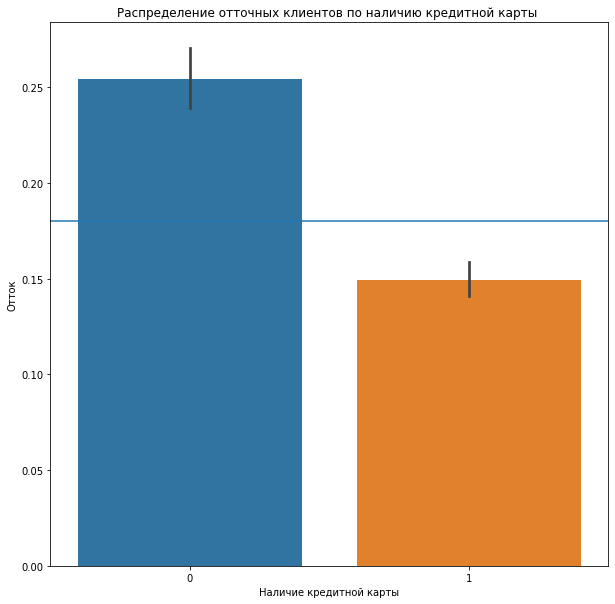

In [59]:
plt.figure(figsize=(10, 10))
sns.barplot(data = data, x = 'credit_card', y = 'churn')
plt.axhline(y=total_churn)
plt.xlabel('Наличие кредитной карты')
plt.ylabel('Отток')
plt.title('Распределение отточных клиентов по наличию кредитной карты ')
plt.show()

Отток среди клиентов с дебетовыми картами выше чем с кредитными 

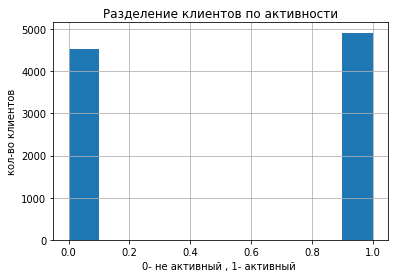

In [60]:
data.last_activity.hist()
plt.xlabel('0- не активный , 1- активный ')
plt.ylabel('кол-во клиентов')
plt.title('Разделение клиентов по активности')
plt.show()

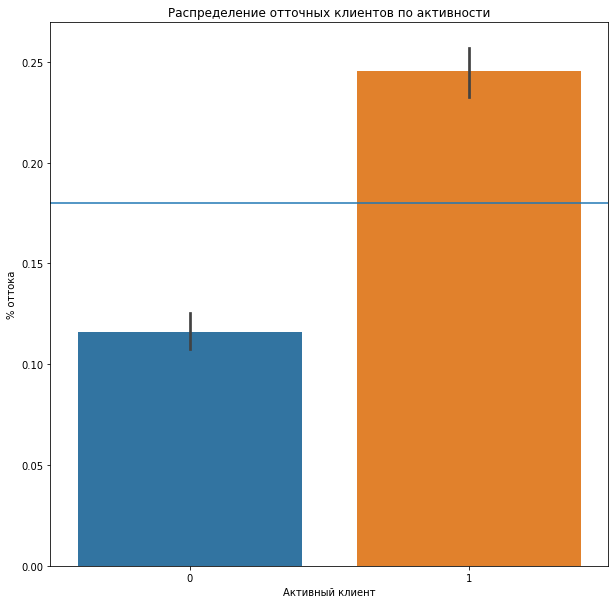

In [61]:
plt.figure(figsize=(10, 10))
sns.barplot(data = data, x = 'last_activity', y = 'churn')
plt.axhline(y=total_churn)
plt.xlabel('Активный клиент')
plt.ylabel('% оттока')
plt.title('Распределение отточных клиентов по активности')
plt.show()

отток среди активных клиентов выше

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Всё верно

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9448 entries, 4410 to 8783
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          9448 non-null   int64  
 1   score            9448 non-null   int64  
 2   city             9448 non-null   object 
 3   gender           9448 non-null   object 
 4   age              9448 non-null   int64  
 5   equity           9448 non-null   int64  
 6   balance          9448 non-null   int64  
 7   products         9448 non-null   int64  
 8   credit_card      9448 non-null   int64  
 9   last_activity    9448 non-null   int64  
 10  est_salary       9448 non-null   float64
 11  churn            9448 non-null   int64  
 12  город_Ростов     9448 non-null   uint8  
 13  город_Рыбинск    9448 non-null   uint8  
 14  город_Ярославль  9448 non-null   uint8  
 15  пол_Ж            9448 non-null   uint8  
 16  пол_М            9448 non-null   uint8  
dtypes: float64(

In [63]:
data_corr = data.loc[:,'score':'пол_М'].corr()

In [64]:
data_corr

,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,город_Ростов,город_Рыбинск,город_Ярославль,пол_Ж,пол_М
score,1.000000,-0.009928,0.056024,0.131124,-0.011158,-0.085372,-0.032121,0.185619,0.101966,-0.033060,0.006028,0.018323,-0.002103,0.002103
age,-0.009928,1.000000,0.023019,0.079248,0.021211,-0.126244,-0.010666,-0.066560,-0.050060,0.046081,0.026219,-0.056771,0.212407,-0.212407
equity,0.056024,0.023019,1.000000,0.073724,0.412066,-0.154533,-0.003748,-0.167402,0.255368,0.027526,-0.006586,-0.013842,0.021141,-0.021141
balance,0.131124,0.079248,0.073724,1.000000,0.040053,-0.038101,0.011578,0.156847,0.059966,-0.028202,-0.016056,0.034754,-0.036097,0.036097
products,-0.011158,0.021211,0.412066,0.040053,1.000000,-0.248668,0.038016,-0.120037,0.291657,-0.015110,-0.041161,0.047991,0.023844,-0.023844
credit_card,-0.085372,-0.126244,-0.154533,-0.038101,-0.248668,1.000000,-0.034154,0.014386,-0.126885,-0.096781,-0.050708,0.115302,-0.129123,0.129123
last_activity,-0.032121,-0.010666,-0.003748,0.011578,0.038016,-0.034154,1.000000,-0.024666,0.166695,0.008275,0.050258,-0.051285,0.015464,-0.015464
est_salary,0.185619,-0.066560,-0.167402,0.156847,-0.120037,0.014386,-0.024666,1.000000,0.041199,-0.100969,-0.041162,0.109701,-0.116241,0.116241
churn,0.101966,-0.050060,0.255368,0.059966,0.291657,-0.126885,0.166695,0.041199,1.000000,0.001750,-0.030746,0.026478,-0.142789,0.142789
город_Ростов,-0.033060,0.046081,0.027526,-0.028202,-0.015110,-0.096781,0.008275,-0.100969,0.001750,1.000000,-0.254756,-0.488904,0.010900,-0.010900


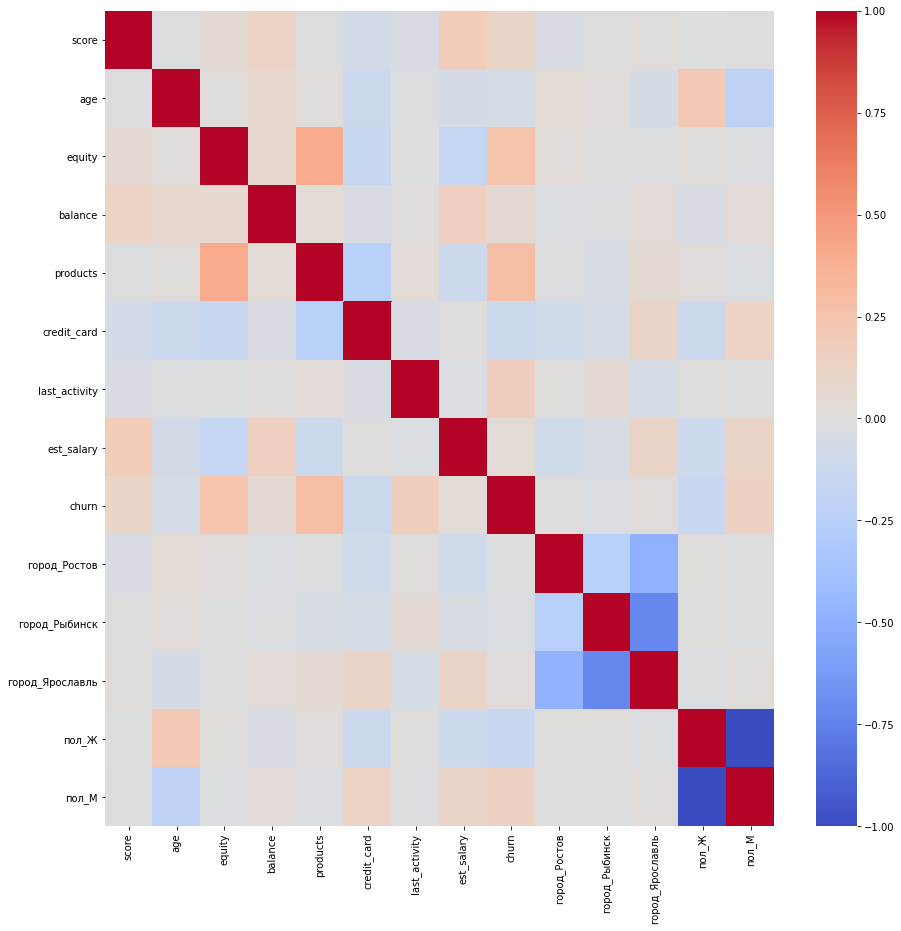

In [65]:
plt.figure(figsize=(15,15))
sns.heatmap(data_corr, cmap='coolwarm', center=0)
plt.show()

In [99]:
new_corr = data_corr['churn'].abs().sort_values(ascending = False).to_frame()

In [102]:
new_corr


,churn
churn,1.000000
products,0.291657
equity,0.255368
last_activity,0.166695
пол_М,0.142789
пол_Ж,0.142789
credit_card,0.126885
score,0.101966
balance,0.059966
age,0.050060


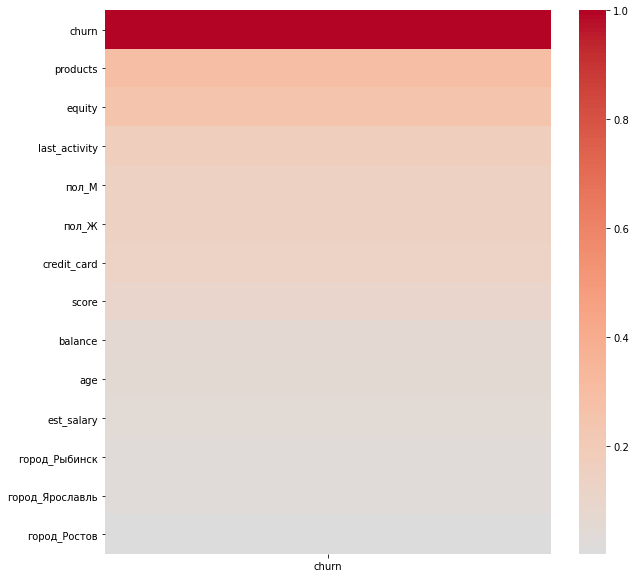

In [101]:
plt.figure(figsize=(10,10))
sns.heatmap(new_corr, cmap='coolwarm', center=0)
plt.show()

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

user_id не нужно анализировать на предмет корреляции Тут user_id может быть связана с хронологией (но при этом корреляцию Пирсона тоже смотреть некорректно, т.к. то что у одного клиента id на тысячу больше чем у другого не говорит нам о конкретном чётком сроке заключения первого договора с банком).

есть заметная корреляция баланса с количеством баллов собственности и количеством продуктов\
есть слабая корреляция оттока с количеством баллов собственности, балансом, активностью и наличием кредитной карты 

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Верная интерпретация корреляции. Так держать!)

Составление портрета клиента 

In [66]:
no_churn = data[data['churn'] == 0]

In [67]:
churn = data[data['churn'] == 1]

In [68]:
no_churn_pivot = no_churn.agg({'score': lambda x: x.median(),
                      'balance': lambda x: x.mean(),
                      'credit_card': lambda x: x.mode().iat[0],
                      'age': lambda x: x.mean(),
                      'products':lambda x: x.mode().iat[0],
                      'last_activity':lambda x: x.mode().iat[0],
                      'est_salary':lambda x: x.median(),
                      'equity': lambda x: x.mode().iat[0],
                      'city': lambda x: x.mode().iat[0],
                      'gender': lambda x: x.mode().iat[0],
                      }).T

In [69]:
no_churn_pivot = no_churn_pivot.to_frame()


In [70]:
churn_pivot = churn.agg({'score': lambda x: x.median(),
                      'balance': lambda x: x.mean(),
                      'credit_card': lambda x: x.mode().iat[0],
                      'age': lambda x: x.mean(),
                      'products':lambda x: x.mode().iat[0],
                      'last_activity':lambda x: x.mode().iat[0],
                      'est_salary':lambda x: x.median(),
                      'equity': lambda x: x.mode().iat[0],
                      'city': lambda x: x.mode().iat[0],
                      'gender': lambda x: x.mode().iat[0],
                      }).T

In [71]:
churn_pivot = churn_pivot.to_frame()

In [72]:
new_churn_pivot = no_churn_pivot.merge(churn_pivot, left_index=True, right_index=True)

In [73]:
new_churn_pivot.columns = ['Не отточные','Отточные']

In [74]:
new_churn_pivot

,Не отточные,Отточные
score,846.0,865.0
balance,728474.307802,984892.959007
credit_card,1,1
age,43.064671,41.478637
products,2,2
last_activity,0,1
est_salary,113182.675,120966.26
equity,0,5
city,Ярославль,Ярославль
gender,Ж,М


In [75]:
index_to_remove = ['city', 'gender','score','est_salary']  
new_churn_pivot = new_churn_pivot.drop(index_to_remove)

In [76]:
new_churn_pivot['Относительная разница'] = (new_churn_pivot['Отточные'] - new_churn_pivot['Не отточные']) / new_churn_pivot['Отточные']


In [77]:
new_churn_pivot

,Не отточные,Отточные,Относительная разница
balance,728474.307802,984892.959007,0.260352
credit_card,1,1,0.0
age,43.064671,41.478637,-0.038237
products,2,2,0.0
last_activity,0,1,1.0
equity,0,5,1.0


заметно что у отточных клиентов клиентов выше баланс и больше собственности, возможно они заинтересованны во вкладах и страховании имущества\
так же среди отточных клиентов более распространенными являются активные 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__
    

Для медианы относительную разницу считать не нужно - аналогично можно заполнить заглушкой.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Хорошо, портрет пользователя составлен

## Статистический анализ 

<AxesSubplot:>

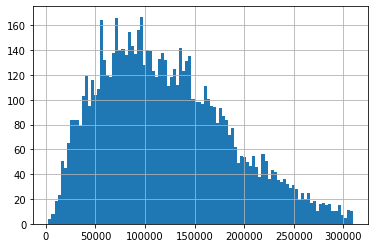

In [78]:
data[data['churn'] == 0]['est_salary'].hist(bins = 100)

<AxesSubplot:>

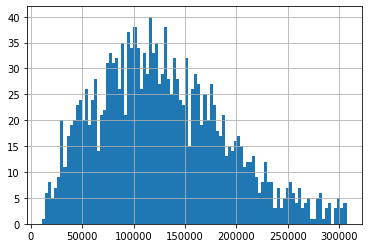

In [79]:
data[data['churn'] == 1]['est_salary'].hist(bins = 100)

У распределения имеется правый хвост

In [80]:
data[data['churn'] == 1]['user_id'].count()

1732

In [81]:
data[data['churn'] == 0]['user_id'].count()

7716

получилась достаточно большая выборка, значит используя ЦПТ мы можем использовать ttest

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Это не нормальное распределение, имеется правый хвост. Стоит обратиться к ЦПТ

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Согласен, данных более 30. Можно использовать стат.тест

Сформируем гипотезы 

Н0 - Средний доход лояльного клиента = Среднему доходу отточного клиента\
Н1 - Средний доход лояльного клиента ≠ Среднему доходу отточного клиента 


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Верная интерпритация нулевой и альтернативной гипотез
</div>

Наши гипотезы являются двустронними поскольку мы проверяем возможность их равенства, для теста подойдет двусторонний T test, применим equal_var=False поскольку имееем разные размеры выборок

In [82]:
churn_tt = data[data['churn'] == 1]['est_salary']
no_churn_tt = data[data['churn'] == 0]['est_salary']

alpha = 0.05
result = st.ttest_ind(churn_tt, no_churn_tt, equal_var=False)
print(result.pvalue)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую теорию')

4.176912861953256e-05
Отвергаем нулевую гипотезу


In [83]:
print('Средний предполагаемый доход лояльных клиентов', data[data['churn'] == 0]['est_salary'].mean().round())
print('Средний предполагаемый доход отточных клиентов', data[data['churn'] == 1]['est_salary'].mean().round())

Средний предполагаемый доход лояльных клиентов 121194.0
Средний предполагаемый доход отточных клиентов 127989.0


Отвергаем нулевую теорию, вероятность что доходы отточных и лояльных клиентов равны - низка 

Проверка второй гипотезы 

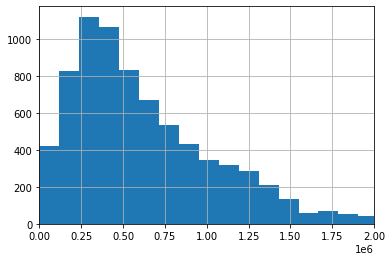

In [84]:
data[data['churn'] == 0]['balance'].hist(bins = 1000)
plt.xlim(0,2000000);

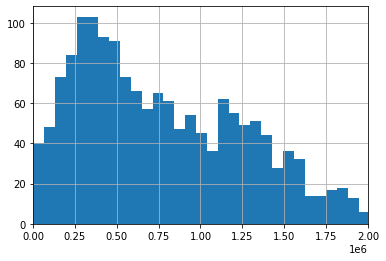

In [85]:
data[data['churn'] == 1]['balance'].hist(bins = 1000)
plt.xlim(0,2000000);

Н0 - Средний баланс лояльного клиента = Среднему балансу отточного клиента\
Н1 - Средний баланс лояльного клиента ≠ Среднему балансу отточного клиента 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Отсутствует проверка на нормальность распределения данных

In [86]:
bal_churn_tt = data[data['churn'] == 1]['balance']
bal_no_churn_tt = data[data['churn'] == 0]['balance']

alpha = 0.05
result = st.ttest_ind(bal_churn_tt, bal_no_churn_tt, equal_var=False)
print(result.pvalue)
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую теорию')

2.4282777889249475e-08
Отвергаем нулевую гипотезу


In [87]:
print('Средний баланс лояльных клиентов', data[data['churn'] == 0]['balance'].mean().round())
print('Средний баланс отточных клиентов', data[data['churn'] == 1]['balance'].mean().round())

Средний баланс лояльных клиентов 728474.0
Средний баланс отточных клиентов 984893.0


Отвергаем нулевую теорию, вероятность того что балансы лояльных и отточных клиентов равны - низка 

## Подведение итогов

По результатам исследовательского и статистического анализа можно сделать несколько выводов:

Есть заметная корреляция баланса с количеством баллов собственности и количеством продуктов\
Есть слабая корреляция оттока с количеством баллов собственности, балансом, активностью и наличием кредитной карты 

Отток характерен для клиентов с балансом более 500к, рейтингом от 830 до 870, в возрасте 25-35 и 51-61 год
среди них преобладают мужчины, такие клиенты активные и у них в собственности более 3х активов, у них нет кредитки

Наиболее отточными можно считать клиентов с более чем с 2 продуктами 

Так же подтвердилась гипотеза что у клиентов которые уходят больше баланс, возможно они нашли более выгодные условия хранения своих сбережений 

<div class="alert alert-block alert-warning">📝
    

__Комментарий от тимлида №1__


Поправь, пожалуйста, выводы после корректировки

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Методологически проверка гипотез проведена верно и наглядный вывод результатов. Так держать!
</div>

Сегментация клиентов 

При выборе сегментов будем ориентироваться на исследовательский и статистический анализ 

In [88]:
first_condition = data[data['age'] >= 25]
first_condition = first_condition[first_condition['age'] <= 35]
first_condition = first_condition[first_condition['balance'] > 900000]
print('Количество человек в первом сегменте:',first_condition['user_id'].count())
print('% оттока в сегменте:',first_condition['churn'].sum()/first_condition['churn'].count())
print('Средний отток по банку:',total_churn )


Количество человек в первом сегменте: 602
% оттока в сегменте: 0.3588039867109635
Средний отток по банку: 0.18


In [89]:
sec_cond = data[data['age'] >= 51]
sec_cond = sec_cond[sec_cond['age'] <= 61]
sec_cond = sec_cond[sec_cond['equity'] > 3]
print('Количество человек во втором сегменте:',sec_cond['user_id'].count())
print('% оттока в сегменте:',sec_cond['churn'].sum()/sec_cond['churn'].count())
print('Средний отток по банку',total_churn )

Количество человек во втором сегменте: 688
% оттока в сегменте: 0.3633720930232558
Средний отток по банку 0.18


In [90]:
third_cond = data[data['gender'] == 'М']
third_cond = third_cond[third_cond['last_activity'] == 1]
third_cond = third_cond[third_cond['age'] >= 25]
third_cond = third_cond[third_cond['age'] <= 35]
print('Количество человек в третьем сегменте:', third_cond['user_id'].count())
print('% оттока в сегменте:', third_cond['churn'].sum()/third_cond['churn'].count())
print('Средний отток по банку',total_churn )

Количество человек в третьем сегменте: 912
% оттока в сегменте: 0.3432017543859649
Средний отток по банку 0.18


<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Отличные сегменты)))

## Приоритезация сегментов:

Рекомендую начать с первых двух сегментов, так как в них у нас нет разделения по полу, а значит мы сможем использовать более универсальные решения

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №1__

Согласен

## Формирование рекомендаций для оттела маркетинга 

В первую очередь хочется обратить внимание на сегмент клиентов в возрасте 25-35 баланс которых превышает 900 000, по которым мы имеем большой отток, тк эти люди потенциальные вкладчики, мы могли бы предложить им вклады на более выгодных условиях или повышенных процент на остаток 

Так же хочется отметить сегмент в возрасте от 51 до 61 года в чьем распоряжении находятся более 3х активов, мы могли бы предложить им льготные условия по страхованию или возможность застраховать больше двух видов имущества со скидкой 


Стоит так же обратить внимание на активных клиентов с балансом более 600 000 и большим количеством собственности исходя из полученного портрета клиента.\
Как показала проверка гипотез, предполагаемый доход не влияет на отток клиента 

<div class="alert alert-block alert-danger">✍
    

__Комментарий от тимлида №1__

Хорошие рекомендации, но отсутствует описание портрета пользователя и информации про гипотезы. Иначе непонятно, зачем мы их рассматривали

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №2__

Спасибо за правку

<div class="alert alert-block alert-warning">📝
Комментарий от тимлида №1 </b> 



Итог ревью - ты проделал хорошую работу! Многие расчеты корректные, грамотная интерпретация полученных результатов! У тебя есть понимание данного процесса. Но есть некоторые моменты которые тебе предстоит доработать, чтобы я смог принять твой проект. Если возникнут вопросы - обязательно задавай. Буду ждать!

---


----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-block alert-warning">📝
Комментарий от тимлида №2 </b> 



Отличная работа, осталось поправить пару моментов на этапе предобработки

---


----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-block alert-warning">📝
Комментарий от тимлида №3 </b> 



Последний штрих:

---


----


Если у тебя будут какие-то вопросы по моим комментариям - обязательно пиши! Буду ждать работу на повторное ревью :)</div>

<div class="alert alert-block alert-success">✔️
    

__Комментарий от тимлида №4__

От себя хочу порекомендовать тебе отличную книгу про язык Python. Она очень классная (можно купить как новую, так и на Авито попадается. Вот ссылка на pdf этой книги)
    
https://monster-book.com/avtomatizaciya-zadach-s-python
    
---
    


Все замечания учтены. Успехов на АВ тесте!
</div>